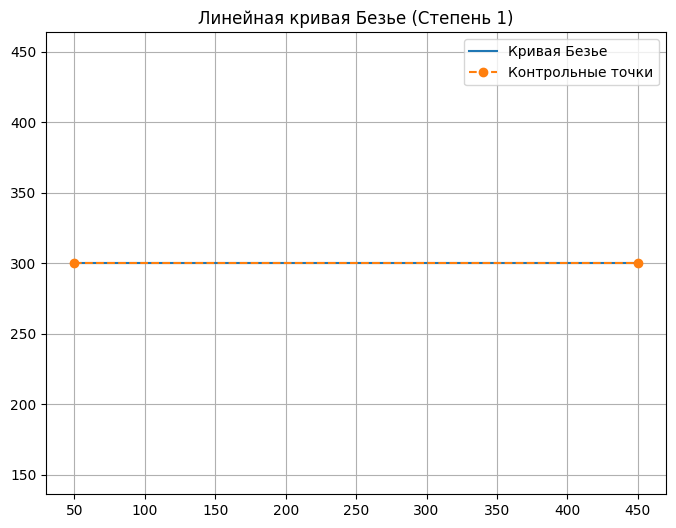

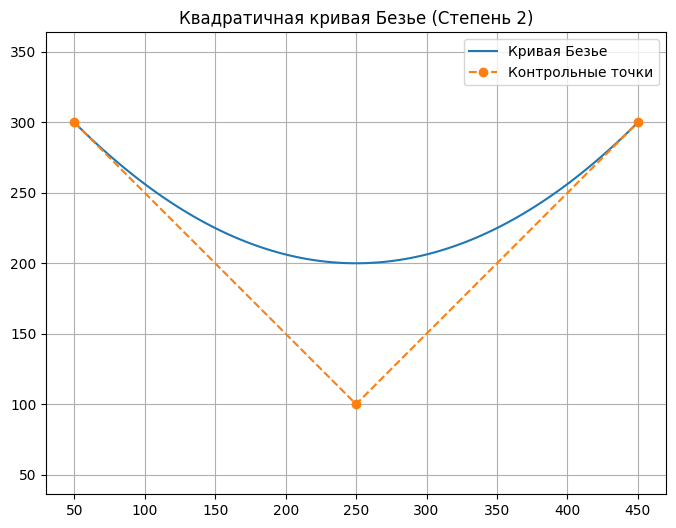

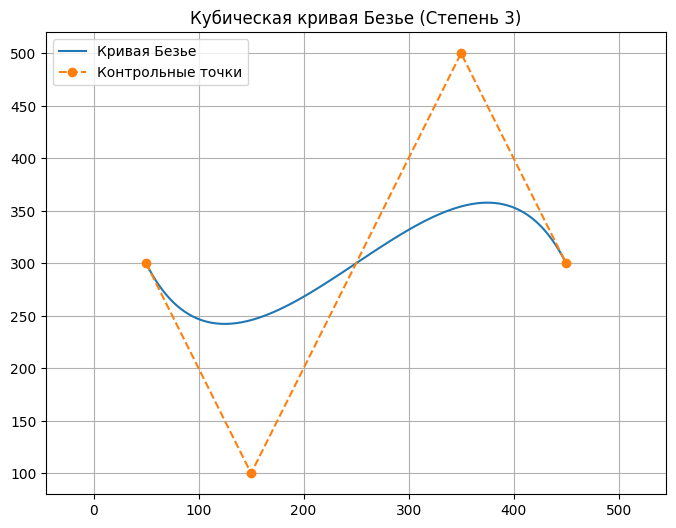

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def linear_bezier(P0, P1, t):
    """
    Линейная кривая Безье (степень 1).
    """
    return (1 - t) * P0 + t * P1

def quadratic_bezier(P0, P1, P2, t):
    """
    Квадратичная кривая Безье (степень 2).
    """
    return (1 - t)**2 * P0 + 2 * (1 - t) * t * P1 + t**2 * P2

def cubic_bezier(P0, P1, P2, P3, t):
    """
    Кубическая кривая Безье (степень 3).
    """
    return (1 - t)**3 * P0 + 3 * (1 - t)**2 * t * P1 + 3 * (1 - t) * t**2 * P2 + t**3 * P3

def plot_bezier_curve(curve_func, control_points, num_points=100, title=''):
    """
    Визуализирует кривую Безье вместе с контрольными точками.
    
    :param curve_func: Функция вычисления кривой Безье.
    :param control_points: Список контрольных точек.
    :param num_points: Количество точек для построения кривой.
    :param title: Заголовок графика.
    """
    t_values = np.linspace(0, 1, num_points)
    curve = np.array([curve_func(*control_points, t) if len(control_points) == 4 else
                      curve_func(*control_points, t) if len(control_points) == 3 else
                      curve_func(*control_points, t)
                      for t in t_values])
    
    control_points = np.array(control_points)
    
    plt.figure(figsize=(8, 6))
    plt.plot(curve[:,0], curve[:,1], label='Кривая Безье')
    plt.plot(control_points[:,0], control_points[:,1], 'o--', label='Контрольные точки')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.show()

# Пример 1: Линейная кривая Безье
P0 = np.array([50, 300])
P1 = np.array([450, 300])

plot_bezier_curve(linear_bezier, [P0, P1], title='Линейная кривая Безье (Степень 1)')

# Пример 2: Квадратичная кривая Безье
P0 = np.array([50, 300])
P1 = np.array([250, 100])
P2 = np.array([450, 300])

plot_bezier_curve(quadratic_bezier, [P0, P1, P2], title='Квадратичная кривая Безье (Степень 2)')

# Пример 3: Кубическая кривая Безье
P0 = np.array([50, 300])
P1 = np.array([150, 100])
P2 = np.array([350, 500])
P3 = np.array([450, 300])

plot_bezier_curve(cubic_bezier, [P0, P1, P2, P3], title='Кубическая кривая Безье (Степень 3)')

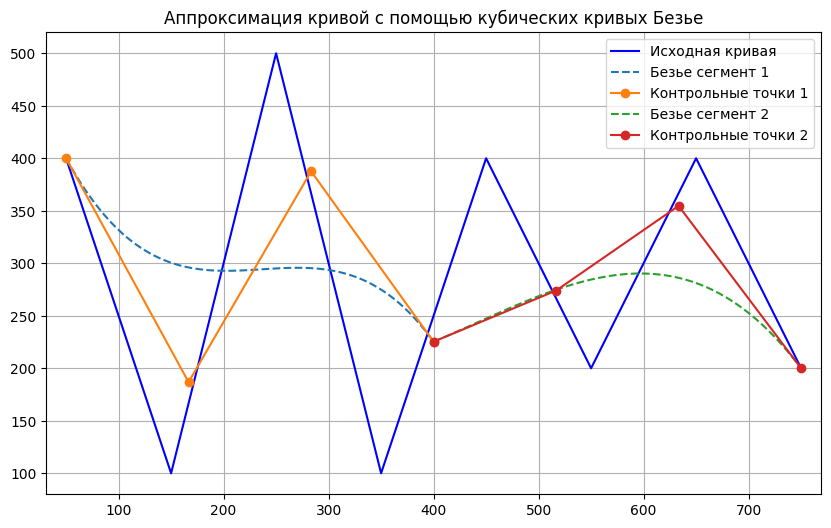

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

def cubic_bezier(P0, P1, P2, P3, t):
    """
    Кубическая кривая Безье (степень 3).
    """
    return (1 - t)**3 * P0 + 3 * (1 - t)**2 * t * P1 + 3 * (1 - t) * t**2 * P2 + t**3 * P3

def approximate_curve_with_bezier(original_points, num_segments=3):
    """
    Аппроксимирует произвольную кривую с помощью кубических кривых Безье.
    
    :param original_points: Список точек исходной кривой.
    :param num_segments: Количество сегментов кривой Безье.
    :return: Список аппроксимированных контрольных точек.
    """
    original_points = np.array(original_points)
    x = original_points[:,0]
    y = original_points[:,1]
    
    # Интерполируем кривую для получения гладкой функции
    spline = make_interp_spline(x, y, k=3)
    x_new = np.linspace(x.min(), x.max(), num_segments * 3 + 1)
    y_new = spline(x_new)
    
    # Разбиваем на сегменты и вычисляем контрольные точки
    control_points = []
    for i in range(num_segments):
        P0 = np.array([x_new[i*3], y_new[i*3]])
        P1 = np.array([x_new[i*3 + 1], y_new[i*3 + 1]])
        P2 = np.array([x_new[i*3 + 2], y_new[i*3 + 2]])
        P3 = np.array([x_new[i*3 + 3], y_new[i*3 + 3]])
        control_points.append([P0, P1, P2, P3])
    return control_points

def plot_approximated_curve(original_points, control_points, title=''):
    """
    Визуализирует исходную кривую и ее аппроксимацию кривыми Безье.
    
    :param original_points: Исходные точки кривой.
    :param control_points: Список контрольных точек кривых Безье.
    :param title: Заголовок графика.
    """
    original_points = np.array(original_points)
    plt.figure(figsize=(10, 6))
    plt.plot(original_points[:,0], original_points[:,1], label='Исходная кривая', color='blue')
    
    for idx, cp in enumerate(control_points):
        bezier = np.array([cubic_bezier(*cp, t) for t in np.linspace(0, 1, 100)])
        plt.plot(bezier[:,0], bezier[:,1], label=f'Безье сегмент {idx+1}', linestyle='--')
        cp = np.array(cp)
        plt.plot(cp[:,0], cp[:,1], 'o-', label=f'Контрольные точки {idx+1}')
    
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.show()

# Определение исходных точек произвольной кривой
original_curve = [
    [50, 400], [150, 100], [250, 500], [350, 100],
    [450, 400], [550, 200], [650, 400], [750, 200]
]

# Аппроксимация кривой с помощью кубических кривых Безье
control_pts = approximate_curve_with_bezier(original_curve, num_segments=2)

# Визуализация
plot_approximated_curve(original_curve, control_pts, title='Аппроксимация кривой с помощью кубических кривых Безье')

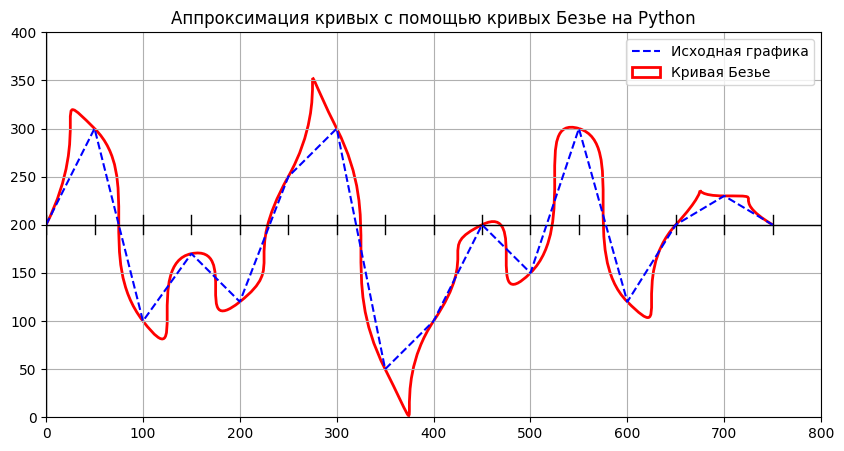

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Определение контрольных точек
graphic_points = [
    {"x": 0, "y": 200},
    {"x": 50, "y": 300},
    {"x": 100, "y": 100},
    {"x": 150, "y": 170},
    {"x": 200, "y": 120},
    {"x": 250, "y": 250},
    {"x": 300, "y": 300},
    {"x": 350, "y": 50},
    {"x": 400, "y": 100},
    {"x": 450, "y": 200},
    {"x": 500, "y": 150},
    {"x": 550, "y": 300},
    {"x": 600, "y": 120},
    {"x": 650, "y": 200},
    {"x": 700, "y": 230},
    {"x": 750, "y": 200}
]

def draw_axes(ax):
    """
    Рисует оси координат и деления по оси X.
    """
    # Рисование осей
    ax.axhline(y=200, color='black', linewidth=1)
    ax.axvline(x=0, color='black', linewidth=1)
    
    # Рисование делений по оси X
    for point in graphic_points:
        ax.plot([point["x"], point["x"]], [190, 210], color='black', linewidth=1)

def draw_initial_chart(ax):
    """
    Рисует начальную графику, соединяя контрольные точки пунктирной линией.
    """
    x = [point["x"] for point in graphic_points]
    y = [point["y"] for point in graphic_points]
    ax.plot(x, y, 'b--', label='Исходная графика')

def compute_control_points(points):
    """
    Вычисляет контрольные точки для каждой точки, обеспечивая плавность кривой.
    Использует метод катмул-ром сплайна для расчета.
    """
    # Преобразование списка точек в массив numpy
    pts = np.array([[p["x"], p["y"]] for p in points])
    
    # Добавление виртуальных точек для граничных условий
    pts_extended = np.vstack([pts[0], pts, pts[-1]])
    
    control_points = []
    for i in range(1, len(pts_extended) -1):
        p0 = pts_extended[i -1]
        p1 = pts_extended[i]
        p2 = pts_extended[i +1]
        
        # Вычисление коэффициента плавности
        k = (p2[1] - p0[1]) / (p2[0] - p0[0]) if (p2[0] - p0[0]) != 0 else 0
        
        # Расчет расстояния для контроля плавности
        delta_x = 50
        delta_y = k * delta_x
        
        # Контрольные точки
        cp1 = p1 - np.array([delta_x, delta_y])
        cp2 = p1 + np.array([delta_x, delta_y])
        
        control_points.append((cp1, cp2))
    
    return control_points

def draw_bezier_curves(ax, points, control_points):
    """
    Рисует кубические кривые Безье между контрольными точками.
    """
    from matplotlib.patches import PathPatch
    from matplotlib.path import Path
    
    for i in range(len(points) -1):
        p0 = points[i]
        p1 = control_points[i][1]
        p2 = control_points[i+1][0]
        p3 = points[i+1]
        
        verts = [tuple(p0), tuple(p1), tuple(p2), tuple(p3)]
        codes = [Path.MOVETO, Path.CURVE4, Path.CURVE4, Path.CURVE4]
        path = Path(verts, codes)
        patch = PathPatch(path, facecolor='none', edgecolor='red', lw=2, label='Кривая Безье' if i ==0 else "")
        ax.add_patch(patch)

def plot_bezier_approximation():
    """
    Создает график с аппроксимацией кривых Безье.
    """
    fig, ax = plt.subplots(figsize=(10, 5))
    
    # Рисование осей
    draw_axes(ax)
    
    # Рисование начальной графики
    draw_initial_chart(ax)
    
    # Вычисление контрольных точек
    control_pts = compute_control_points(graphic_points)
    
    # Рисование кривых Безье
    points = np.array([[p["x"], p["y"]] for p in graphic_points])
    draw_bezier_curves(ax, points, control_pts)
    
    # Настройка графика
    ax.set_title('Аппроксимация кривых с помощью кривых Безье на Python')
    ax.set_xlim(0, 800)
    ax.set_ylim(0, 400)
    ax.legend()
    ax.grid(True)
    plt.show()

plot_bezier_approximation()